###Introduction


This is a short introduction to pandas, geared mainly for new users. You can see more complex recipes in the <a href="https://pandas.pydata.org/docs/user_guide/cookbook.html#cookbook" target="_blank">Cookbook<a/>.

Customarily, we import as follows:

In [2]:
import numpy as np
import pandas as pd

## Object Creation


See the <a target="_blank" href="https://pandas.pydata.org/docs/user_guide/dsintro.html#dsintro">Intro to data structures section</a>.

Creating a <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.Series.html#pandas.Series">`Series`</a> by passing a list of values, letting pandas create a default integer index:

In [3]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])
s

,0
0,1.0
1,3.0
2,5.0
3,NaN
4,6.0
5,8.0


Creating a <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame">`DataFrame`</a> by passing a NumPy array, with a datetime index using <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.date_range.html#pandas.date_range">`date_range()`</a> and labeled columns:

In [4]:
dates = pd.date_range("20130101", periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

dtype='datetime64[ns]':

dtype stands for "data type."

datetime64[ns] is a NumPy data type that represents dates and times down to the nanosecond precision. This precision allows for highly accurate time series analysis.
freq='D':

freq stands for "frequency."

 **'D'** indicates that the dates in the DatetimeIndex have a daily frequency. In other words, the index includes every day from January 1, 2013, to January 6, 2013, inclusive.

np.random.randn:

This is a function in the NumPy library.

**randn** :

generates samples from the "standard normal" distribution, which has a mean of 0 and a standard deviation of 1.
The numbers generated are floating-point numbers.

(6, 4):

These numbers specify the shape of the output array.
6 is the number of rows.
4 is the number of columns.

In [5]:
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list("ABCD"))
df

,A,B,C,D
2013-01-01,-0.346574,0.938334,-1.898428,1.981864
2013-01-02,-1.499392,-0.358026,0.157228,-0.390583
2013-01-03,-0.245598,-0.057289,1.009448,0.145239
2013-01-04,0.356184,-0.590748,0.668132,-0.211207
2013-01-05,0.578825,0.631626,-0.819338,-0.240566
2013-01-06,-0.417013,0.126170,0.757636,-1.442864


Creating a <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame">`DataFrame`</a> by passing a dictionary of objects that can be converted into a series-like structure:

The code np.array([3] * 4, dtype="int32") creates a NumPy array filled with the integer value 3. Here’s how it works:

Breakdown:
[3] * 4:

This creates a Python list that contains the value 3 repeated 4 times.
The resulting list is [3, 3, 3, 3].

np.array():


*   This function converts the list into a NumPy array.
*   The array is a powerful data structure in NumPy that allows for efficient mathematical operations.

dtype="int32":

dtype specifies the data type of the elements in the array.
"int32" means that each element in the array is a 32-bit integer.


In [6]:
df2 = pd.DataFrame(
    {
        "A": 1.0,
        "B": pd.Timestamp("20130102"),
        "C": pd.Series(1, index=list(range(4)), dtype="float32"),
        "D": np.array([3] * 4, dtype="int32"),
        "E": pd.Categorical(["test", "train", "test", "train"]),
        "F": "foo",
    }
)
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


The columns of the resulting <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame">`DataFrame`</a> have different <a target="_blank" href="https://pandas.pydata.org/docs/user_guide/basics.html#basics-dtypes">`dtypes`</a>:

In [7]:
df2.dtypes

,0
A,float64
B,datetime64[s]
C,float32
D,int32
E,category
F,object


If you’re using an interactive tool with automatic completion for column names, here’s a subset of the attributes that will be completed:
```
df2.<TAB>
df2.A                  df2.bool
df2.abs                df2.boxplot
df2.add                df2.C
df2.add_prefix         df2.clip
df2.add_suffix         df2.columns
df2.align              df2.copy
df2.all                df2.count
df2.any                df2.combine
df2.append             df2.D
df2.apply              df2.describe
df2.applymap           df2.diff
df2.B                  df2.duplicated
```
As you can see, the columns `A`, `B`, `C`, and `D` are automatically tab completed. `E` and `F` are there as well; the rest of the attributes have been truncated for brevity.



## Viewing data

See the <a target="_blank" href="https://pandas.pydata.org/docs/user_guide/basics.html#basics">Basics section</a>.

Use <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html#pandas.DataFrame.head">`DataFrame.head()`</a> and <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.tail.html#pandas.DataFrame.tail">`DataFrame.tail()`</a> to view the top and bottom rows of the frame respectively:

In [6]:
df.head()

,A,B,C,D
2013-01-01,-0.346574,0.938334,-1.898428,1.981864
2013-01-02,-1.499392,-0.358026,0.157228,-0.390583
2013-01-03,-0.245598,-0.057289,1.009448,0.145239
2013-01-04,0.356184,-0.590748,0.668132,-0.211207
2013-01-05,0.578825,0.631626,-0.819338,-0.240566


In [9]:
df.tail(3)

,A,B,C,D
2013-01-04,-1.918902,-0.656535,0.952149,0.411003
2013-01-05,0.263469,0.105860,-0.933280,0.862901
2013-01-06,-1.080871,0.755396,-0.306525,-0.253735


Display the <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.index.html#pandas.DataFrame.index">`DataFrame.index`</a> or <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.columns.html#pandas.DataFrame.columns">`DataFrame.columns`</a>:

In [7]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [8]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

<a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_numpy.html#pandas.DataFrame.to_numpy">`DataFrame.to_numpy()`</a> gives a NumPy representation of the underlying data. Note that this can be an expensive operation when your <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame">`DataFrame`</a> has columns with different data types, which comes down to a fundamental difference between pandas and NumPy: **NumPy arrays have one dtype for the entire array, while pandas DataFrames have one dtype per column**. When you call <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_numpy.html#pandas.DataFrame.to_numpy">`DataFrame.to_numpy()`</a>, pandas will find the NumPy dtype that can hold all of the dtypes in the DataFrame. This may end up being `object`, which requires casting every value to a Python object.

For `df`, our <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame">`DataFrame`</a> of all floating-point values, and <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_numpy.html#pandas.DataFrame.to_numpy">`DataFrame.to_numpy()`</a> is fast and doesn’t require copying data:

In [9]:
df.to_numpy()

array([[-0.34657353,  0.93833448, -1.89842834,  1.98186412],
       [-1.49939164, -0.35802571,  0.15722832, -0.39058319],
       [-0.24559848, -0.05728852,  1.00944833,  0.14523891],
       [ 0.35618425, -0.59074782,  0.66813222, -0.21120659],
       [ 0.57882511,  0.63162569, -0.81933805, -0.24056639],
       [-0.41701337,  0.1261697 ,  0.75763614, -1.44286402]])

For `df2`, the <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame">`DataFrame`</a> with multiple dtypes, <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_numpy.html#pandas.DataFrame.to_numpy">`DataFrame.to_numpy()`</a> is relatively expensive:



In [10]:
df2.to_numpy()

NameError: name 'df2' is not defined

NOTE: <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_numpy.html#pandas.DataFrame.to_numpy">`DataFrame.to_numpy()`</a> does not include the index or column labels in the output.

<a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html#pandas.DataFrame.describe">`describe()`</a> shows a quick statistic summary of your data:

In [11]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.262261,0.115011,-0.020887,-0.026353
std,0.728248,0.582481,1.125775,1.120857
min,-1.499392,-0.590748,-1.898428,-1.442864
25%,-0.399403,-0.282841,-0.575196,-0.353079
50%,-0.296086,0.034441,0.412680,-0.225886
75%,0.205739,0.505262,0.735260,0.056128
max,0.578825,0.938334,1.009448,1.981864


Transposing your data:

In [12]:
df.T

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,-0.346574,-1.499392,-0.245598,0.356184,0.578825,-0.417013
B,0.938334,-0.358026,-0.057289,-0.590748,0.631626,0.126170
C,-1.898428,0.157228,1.009448,0.668132,-0.819338,0.757636
D,1.981864,-0.390583,0.145239,-0.211207,-0.240566,-1.442864


<a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_index.html#pandas.DataFrame.sort_index">`DataFrame.sort_index()`</a> sorts by an axis:

In [17]:
df.sort_index(axis=0, ascending=False)

,A,B,C,D
2013-01-06,-1.080871,0.755396,-0.306525,-0.253735
2013-01-05,0.263469,0.105860,-0.933280,0.862901
2013-01-04,-1.918902,-0.656535,0.952149,0.411003
2013-01-03,1.321455,0.482942,-0.080205,-0.136223
2013-01-02,-0.065442,2.299954,1.928057,-0.112675
2013-01-01,-0.574853,-0.971828,0.027743,-0.811791


<a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html#pandas.DataFrame.sort_values">`DataFrame.sort_values()`</a> sorts by values:

In [18]:
df.sort_values(by='B')

,A,B,C,D
2013-01-01,-0.574853,-0.971828,0.027743,-0.811791
2013-01-04,-1.918902,-0.656535,0.952149,0.411003
2013-01-05,0.263469,0.105860,-0.933280,0.862901
2013-01-03,1.321455,0.482942,-0.080205,-0.136223
2013-01-06,-1.080871,0.755396,-0.306525,-0.253735
2013-01-02,-0.065442,2.299954,1.928057,-0.112675


## Selection

NOTE: While standard Python / NumPy expressions for selecting and setting are intuitive and come in handy for interactive work, for production code, we recommend the optimized pandas data access methods, <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.at.html#pandas.DataFrame.at">`DataFrame.at()`</a>, <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iat.html#pandas.DataFrame.iat">`DataFrame.iat()`</a>, <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html#pandas.DataFrame.loc">`DataFrame.loc()`</a> and <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iloc.html#pandas.DataFrame.iloc">`DataFrame.iloc()`</a>.

See the indexing documentation <a target="_blank" href="https://pandas.pydata.org/docs/user_guide/indexing.html#indexing">Indexing and Selecting Data</a> and <a target="_blank" href="https://pandas.pydata.org/docs/user_guide/advanced.html#advanced">MultiIndex / Advanced Indexing</a>.



### Getting

Selecting a single column, which yields a <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.Series.html#pandas.Series">`Series`</a>, equivalent to `df.A`:

In [19]:
df["A"]

,A
2013-01-01,-0.574853
2013-01-02,-0.065442
2013-01-03,1.321455
2013-01-04,-1.918902
2013-01-05,0.263469
2013-01-06,-1.080871


Selecting via `[]` (`__getitem__`), which slices the rows:

[0:3]:

This is a slicing operation on the DataFrame.
In Python, slicing is done using the format [start:stop], where:

start is the index of the first row to include (0-based index).
stop is the index of the first row to **exclude**.
Therefore, 0:3 means "start at row 0 and go up to, **but not including, row 3**."

In [22]:
df[0:3]

,A,B,C,D
2013-01-01,-0.574853,-0.971828,0.027743,-0.811791
2013-01-02,-0.065442,2.299954,1.928057,-0.112675
2013-01-03,1.321455,0.482942,-0.080205,-0.136223


In [23]:
df["20130102":"20130104"]

,A,B,C,D
2013-01-02,-0.065442,2.299954,1.928057,-0.112675
2013-01-03,1.321455,0.482942,-0.080205,-0.136223
2013-01-04,-1.918902,-0.656535,0.952149,0.411003


### Selection by label

See more in <a target="_blank" href="https://pandas.pydata.org/docs/user_guide/indexing.html#indexing-label">Selection by Label</a> using <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html#pandas.DataFrame.loc">`DataFrame.loc()`</a> or <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.at.html#pandas.DataFrame.at">`DataFrame.at()`</a>.

For getting a cross section using a label:

Breakdown:

df:


df is the DataFrame from which you want to select data.

loc[]:

loc is an attribute of the DataFrame that is used for label-based indexing.
It allows you to access rows and columns by their labels (which are typically the row or column names) rather than by integer position.

dates[0]:

dates appears to be a sequence (likely a DatetimeIndex or a list of date labels) that contains date or datetime values.
dates[0] refers to the first element in the dates sequence, which is expected to be a date or datetime label.


In [ ]:
df.loc[dates[0]]

A   -0.524103
B    0.913936
C   -0.648058
D    2.680350
Name: 2013-01-01 00:00:00, dtype: float64

df:

df is the DataFrame from which you want to select data.

loc[]:

loc is a Pandas method used for label-based indexing.
It allows you to select rows and columns using labels (row and column names).

::

The colon : within the loc[] method is used to select all rows.
It’s a slicing operation that means "select everything" along the axis (in this case, all rows).

["A", "B"]:

This is a list of column labels that you want to select.
In this case, you are selecting columns "A" and "B".

Selecting on a multi-axis by label:

In [ ]:
df.loc[:, ["A", "B"]]

,A,B
2013-01-01,-0.524103,0.913936
2013-01-02,-1.354008,-1.750013
2013-01-03,0.977944,-0.449545
2013-01-04,-0.051502,-1.190048
2013-01-05,0.503904,-1.634828
2013-01-06,-0.300019,-0.068817


Showing label slicing, both endpoints are included:

In [24]:
df.loc["20130102":"20130104", ["A", "B"]]

,A,B
2013-01-02,-0.065442,2.299954
2013-01-03,1.321455,0.482942
2013-01-04,-1.918902,-0.656535


Reduction in the dimensions of the returned object:

In [ ]:
df.loc["20130102", ["A", "B"]]

A   -1.354008
B   -1.750013
Name: 2013-01-02 00:00:00, dtype: float64

For getting a scalar value:

In [25]:
df.loc[dates[0], "A"]

-0.5748527409456287

For getting fast access to a scalar (equivalent to the prior method):

In [ ]:
df.at[dates[0], "A"]

### Selection by position

See more in <a target="_blank" href="https://pandas.pydata.org/docs/user_guide/indexing.html#indexing-integer">Selection by Position</a> using <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iloc.html#pandas.DataFrame.iloc">`DataFrame.iloc()`</a> or <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.at.html#pandas.DataFrame.at">`DataFrame.at()`</a>.

Select via the position of the passed integers:

In [ ]:
df.iloc[3]

A   -0.051502
B   -1.190048
C    0.502404
D    0.515585
Name: 2013-01-04 00:00:00, dtype: float64

By integer slices, acting similar to NumPy/Python:

In [27]:
df.iloc[3:5, 0:2]

,A,B
2013-01-04,-1.918902,-0.656535
2013-01-05,0.263469,0.105860


By lists of integer position locations, similar to the NumPy/Python style:

In [28]:
df.iloc[[1, 2, 4], [0, 2]]

,A,C
2013-01-02,-0.065442,1.928057
2013-01-03,1.321455,-0.080205
2013-01-05,0.263469,-0.933280


For slicing rows explicitly:

In [29]:
df.iloc[1:3, :]

,A,B,C,D
2013-01-02,-0.065442,2.299954,1.928057,-0.112675
2013-01-03,1.321455,0.482942,-0.080205,-0.136223


For slicing columns explicitly:

In [ ]:
df.iloc[:, 1:3]

,B,C
2013-01-01,0.913936,-0.648058
2013-01-02,-1.750013,-0.009807
2013-01-03,-0.449545,-0.545343
2013-01-04,-1.190048,0.502404
2013-01-05,-1.634828,0.749093
2013-01-06,-0.068817,-1.336835


For getting a value explicitly:

In [30]:
df.iloc[1, 1]

2.299954125946758

For getting fast access to a scalar (equivalent to the prior method):

In [31]:
df.iat[1, 1]

2.299954125946758

### Boolean indexing

Using a single column’s values to select data:

In [ ]:
df[df["A"] > 0]

,A,B,C,D
2013-01-03,0.977944,-0.449545,-0.545343,-1.075350
2013-01-05,0.503904,-1.634828,0.749093,-0.481287


Selecting values from a DataFrame where a boolean condition is met:

In [14]:
df[df > 0]

,A,B,C,D
2013-01-01,NaN,0.938334,NaN,1.981864
2013-01-02,NaN,NaN,0.157228,NaN
2013-01-03,NaN,NaN,1.009448,0.145239
2013-01-04,0.356184,NaN,0.668132,NaN
2013-01-05,0.578825,0.631626,NaN,NaN
2013-01-06,NaN,0.126170,0.757636,NaN


Using the <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.Series.isin.html#pandas.Series.isin">`isin()`</a> method for filtering:

In [18]:
df2 = df.copy()
df2["E"] = ["one", "one", "two", "three", "four", "three"]
df2

,A,B,C,D,E
2013-01-01,-0.346574,0.938334,-1.898428,1.981864,one
2013-01-02,-1.499392,-0.358026,0.157228,-0.390583,one
2013-01-03,-0.245598,-0.057289,1.009448,0.145239,two
2013-01-04,0.356184,-0.590748,0.668132,-0.211207,three
2013-01-05,0.578825,0.631626,-0.819338,-0.240566,four
2013-01-06,-0.417013,0.126170,0.757636,-1.442864,three


In [19]:
df2[df2["E"].isin(["two", "four"])]

,A,B,C,D,E
2013-01-03,-0.245598,-0.057289,1.009448,0.145239,two
2013-01-05,0.578825,0.631626,-0.819338,-0.240566,four


### Setting

Setting a new column automatically aligns the data by the indexes:

In [20]:
s1 = pd.Series([1, 2, 3, 4, 5, 6], index=pd.date_range("20130102", periods=6))
s1

,0
2013-01-02,1
2013-01-03,2
2013-01-04,3
2013-01-05,4
2013-01-06,5
2013-01-07,6


In [21]:
df["F"] = s1

Setting values by label:

In [30]:
df.at[dates[0], "A"] = 0
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-1.898428,5.0,NaN
2013-01-02,-1.499392,-0.358026,0.157228,5.0,1.0
2013-01-03,-0.245598,-0.057289,1.009448,5.0,2.0
2013-01-04,0.356184,-0.590748,0.668132,5.0,3.0
2013-01-05,0.578825,0.631626,-0.819338,5.0,4.0
2013-01-06,-0.417013,0.126170,0.757636,5.0,5.0


Setting values by position:

In [32]:
df.iat[0, 1] = 12
df

,A,B,C,D,F
2013-01-01,0.000000,12.000000,-1.898428,5.0,NaN
2013-01-02,-1.499392,-0.358026,0.157228,5.0,1.0
2013-01-03,-0.245598,-0.057289,1.009448,5.0,2.0
2013-01-04,0.356184,-0.590748,0.668132,5.0,3.0
2013-01-05,0.578825,0.631626,-0.819338,5.0,4.0
2013-01-06,-0.417013,0.126170,0.757636,5.0,5.0


Setting by assigning with a NumPy array:

In [34]:
df.loc[:, "D"] = np.array([6] * len(df))
df

,A,B,C,D,F
2013-01-01,0.000000,12.000000,-1.898428,6.0,NaN
2013-01-02,-1.499392,-0.358026,0.157228,6.0,1.0
2013-01-03,-0.245598,-0.057289,1.009448,6.0,2.0
2013-01-04,0.356184,-0.590748,0.668132,6.0,3.0
2013-01-05,0.578825,0.631626,-0.819338,6.0,4.0
2013-01-06,-0.417013,0.126170,0.757636,6.0,5.0


The result of the prior setting operations:

In [35]:
df

,A,B,C,D,F
2013-01-01,0.000000,12.000000,-1.898428,6.0,NaN
2013-01-02,-1.499392,-0.358026,0.157228,6.0,1.0
2013-01-03,-0.245598,-0.057289,1.009448,6.0,2.0
2013-01-04,0.356184,-0.590748,0.668132,6.0,3.0
2013-01-05,0.578825,0.631626,-0.819338,6.0,4.0
2013-01-06,-0.417013,0.126170,0.757636,6.0,5.0


A `where` operation with setting:

In [37]:
df2 = df.copy()
df2[df2 > 0] = -df2
df2

,A,B,C,D,F
2013-01-01,0.000000,-12.000000,-1.898428,-6.0,NaN
2013-01-02,-1.499392,-0.358026,-0.157228,-6.0,-1.0
2013-01-03,-0.245598,-0.057289,-1.009448,-6.0,-2.0
2013-01-04,-0.356184,-0.590748,-0.668132,-6.0,-3.0
2013-01-05,-0.578825,-0.631626,-0.819338,-6.0,-4.0
2013-01-06,-0.417013,-0.126170,-0.757636,-6.0,-5.0


## Missing data

pandas primarily uses the `np.nan` to represent missing data. It is by default not included in computations. See the [Missing Data](https://pandas.pydata.org/docs/user_guide/missing_data.html#missing-data) section.

Reindexing allows you to change/add/delete the index on a specified axis. This returns a copy of the data:

In [47]:
df1 = df.reindex(index = dates[0:4], columns = list(df.columns) + ['E'])
df1.loc[dates[0] : dates[1], 'E'] = 300
df1

,A,B,C,D,F,E
2013-01-01,0.000000,12.000000,-1.898428,6.0,NaN,300.0
2013-01-02,-1.499392,-0.358026,0.157228,6.0,1.0,300.0
2013-01-03,-0.245598,-0.057289,1.009448,6.0,2.0,NaN
2013-01-04,0.356184,-0.590748,0.668132,6.0,3.0,NaN


[`DataFrame.dropna()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html#pandas.DataFrame.dropna) drops any rows that have missing data:



In [43]:
df1.dropna(how='any')

,A,B,C,D,F,E
2013-01-02,-1.499392,-0.358026,0.157228,6.0,1.0,300.0


[`DataFrame.fillna()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html#pandas.DataFrame.fillna) fills missing data:

In [44]:
df1.fillna(value=5)

,A,B,C,D,F,E
2013-01-01,0.000000,12.000000,-1.898428,6.0,5.0,300.0
2013-01-02,-1.499392,-0.358026,0.157228,6.0,1.0,300.0
2013-01-03,-0.245598,-0.057289,1.009448,6.0,2.0,5.0
2013-01-04,0.356184,-0.590748,0.668132,6.0,3.0,5.0


[`isna()`](https://pandas.pydata.org/docs/reference/api/pandas.isna.html#pandas.isna) gets the boolean mask where values are `nan`:

In [51]:
pd.isna(df)

,A,B,C,D,F
2013-01-01,False,False,False,False,True
2013-01-02,False,False,False,False,False
2013-01-03,False,False,False,False,False
2013-01-04,False,False,False,False,False
2013-01-05,False,False,False,False,False
2013-01-06,False,False,False,False,False


## Operations

See the [Basic section on Binary Ops](https://pandas.pydata.org/docs/user_guide/basics.html#basics-binop).

### Stats

Operations in general *exclude* missing data.

Performing a descriptive statistic:


In [53]:
df.mean()

,0
A,-0.204499
B,1.958622
C,-0.020887
D,6.000000
F,3.000000


Same operation on the other axis:

In [54]:
df.mean(1)

,0
2013-01-01,4.025393
2013-01-02,1.059962
2013-01-03,1.741312
2013-01-04,1.886714
2013-01-05,2.078223
2013-01-06,2.293358


Operating with objects that have different dimensionality and need alignment. In addition, pandas automatically
broadcasts along the specified dimension

.shift(2):

The shift(2) method shifts the data in the Series by 2 positions downward.
The last 2 elements of the Series will be replaced by NaN (since there’s no data to fill those positions after the shift).
The first 2 positions will also become NaN because the data has been moved down.


In [55]:
s = pd.Series([1, 3, 5, np.nan, 6, 8], index = dates).shift(2)
s

,0
2013-01-01,NaN
2013-01-02,NaN
2013-01-03,1.0
2013-01-04,3.0
2013-01-05,5.0
2013-01-06,NaN


The expression df.sub(s, axis='index') in Pandas is used to subtract the values in a Series s from the corresponding rows in a DataFrame df. Here's how it works:

Breakdown:

df.sub(s, axis='index'):

df: This is the DataFrame from which you want to subtract values.
s: This is the Series that contains the values you want to subtract from df.

.sub():

This is a Pandas method used for element-wise subtraction between a DataFrame and another DataFrame, Series, or scalar.

axis='index':

This parameter specifies that the subtraction should be aligned along the rows (i.e., the subtraction is performed for each row in the DataFrame based on the index).

In [56]:
df.sub(s, axis='index')

,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-1.245598,-1.057289,0.009448,5.0,1.0
2013-01-04,-2.643816,-3.590748,-2.331868,3.0,0.0
2013-01-05,-4.421175,-4.368374,-5.819338,1.0,-1.0
2013-01-06,NaN,NaN,NaN,NaN,NaN


### Apply

[`DataFrame.apply()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html#pandas.DataFrame.apply) applies a user defined function to the data:

The expression df.apply(np.cumsum) in Pandas is used to apply the cumulative sum function (np.cumsum) to each column of a DataFrame. Here's a detailed explanation:

Breakdown:
df:

df is the DataFrame on which the operation is being performed.

.apply():

The apply() method in Pandas allows you to apply a function along either the axis of a DataFrame (rows or columns).
By default, apply() operates along the columns (i.e., axis=0).
np.cumsum:

np.cumsum

is a NumPy function that calculates the cumulative sum of the elements in an array.
For each column, it sums the elements progressively, adding each element to the sum of all previous elements in that column.


In [58]:
df.apply(np.cumsum)

,A,B,C,D,F
2013-01-01,0.000000,12.000000,-1.898428,6.0,NaN
2013-01-02,-1.499392,11.641974,-1.741200,12.0,1.0
2013-01-03,-1.744990,11.584686,-0.731752,18.0,3.0
2013-01-04,-1.388806,10.993938,-0.063619,24.0,6.0
2013-01-05,-0.809981,11.625564,-0.882958,30.0,10.0
2013-01-06,-1.226994,11.751733,-0.125321,36.0,15.0


Breakdown:
df:

df is the DataFrame on which the operation is being performed.

.apply():

The apply() method is used to apply a function along an axis of the DataFrame. By default, it operates along the columns (axis=0).

lambda x: x.max() - x.min():


lambda x: ... is an anonymous function (a function without a name).

x.max()

calculates the maximum value of the Series x (which represents a
column when applied with apply).

x.min()

calculates the minimum value of the Series x.
The lambda function then subtracts the minimum value from the maximum value, giving the range of the values in the column.

In [60]:
df.apply(lambda x: x.max() - x.min())

,0
A,2.078217
B,12.590748
C,2.907877
D,0.000000
F,4.000000


### Histogramming

See more at [Histogramming and Discretization](https://pandas.pydata.org/docs/user_guide/basics.html#basics-discretization).

In [61]:
s = pd.Series(np.random.randint(0, 7, size=10))
s

,0
0,5
1,5
2,4
3,3
4,4
5,4
6,0
7,3
8,4
9,2


In [62]:
s.value_counts()

,count
4,4
5,2
3,2
0,1
2,1


### String Methods

Series is equipped with a set of string processing methods in the `str` attribute that make it easy to operate on each element of the array, as in the code snippet below. Note that pattern-matching in `str` generally uses [regular expressions](https://docs.python.org/3/library/re.html) by default (and in some cases always uses them). See more at [Vectorized String Methods](https://pandas.pydata.org/docs/user_guide/text.html#text-string-methods).

In [63]:
s = pd.Series(["A", "B", "C", "Aaba", "Baca", np.nan, "CABA", "dog", "cat"])
s.str.lower()

,0
0,a
1,b
2,c
3,aaba
4,baca
5,NaN
6,caba
7,dog
8,cat


## Merge

### Concat

pandas provides various facilities for easily combining together Series and DataFrame objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations.

See the [Merging section](https://pandas.pydata.org/docs/user_guide/merging.html#merging).

Concatenating pandas objects together along an axis with [`concat()`](https://pandas.pydata.org/docs/reference/api/pandas.concat.html#pandas.concat):

In [64]:
df = pd.DataFrame(np.random.randn(10, 4))
df

,0,1,2,3
0,1.159371,-1.724516,-0.938987,-2.735835
1,-0.630262,0.579608,-0.761208,-0.800728
2,-0.774264,0.064350,1.507446,-1.091729
3,0.661348,1.583253,-0.982746,-0.504152
4,1.655977,-1.236516,0.513961,0.624964
5,0.103717,1.388789,0.974672,0.321625
6,-1.436293,-1.155011,-1.315762,1.119237
7,1.152470,-0.217280,0.917779,0.048955
8,0.695516,-0.531560,0.661318,0.905318
9,-0.483889,1.002461,0.661340,0.148223


pd.concat():

pd.concat()

is a Pandas function used to concatenate or stack multiple DataFrames or Series along a particular axis.

The default axis for concatenation is axis=0, which means the DataFrames or Series are concatenated along the rows (one below the other). If you want to concatenate along columns (side by side), you would use axis=1.

In [65]:
# break it onto pieces
pieces = [df[:3], df[3:7], df[7:]]

pd.concat(pieces)

,0,1,2,3
0,1.159371,-1.724516,-0.938987,-2.735835
1,-0.630262,0.579608,-0.761208,-0.800728
2,-0.774264,0.064350,1.507446,-1.091729
3,0.661348,1.583253,-0.982746,-0.504152
4,1.655977,-1.236516,0.513961,0.624964
5,0.103717,1.388789,0.974672,0.321625
6,-1.436293,-1.155011,-1.315762,1.119237
7,1.152470,-0.217280,0.917779,0.048955
8,0.695516,-0.531560,0.661318,0.905318
9,-0.483889,1.002461,0.661340,0.148223


NOTE: Adding a column to a [`DataFrame`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame) is relatively fast. However, adding a row requires a copy, and may be expensive. We recommend passing a pre-built list of records to the [`DataFrame`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame) constructor instead of building a [`DataFrame`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame) by iteratively appending records to it.

### Join

[`merge()`](https://pandas.pydata.org/docs/reference/api/pandas.merge.html#pandas.merge) enables SQL style join types along specific columns. See the [Database style joining](https://pandas.pydata.org/docs/user_guide/merging.html#merging-join) section.

In [66]:
left = pd.DataFrame({"key": ["foo", "foo"], "lval": [1, 2]})
right = pd.DataFrame({"key": ["foo", "foo"], "rval": [4, 5]})
print(left)
print(right)
pd.merge(left, right, on="key")

   key  lval
0  foo     1
1  foo     2
   key  rval
0  foo     4
1  foo     5


,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


Adding a column to a `DataFrame` is relatively fast. However adding a row requires a copy, and may be expensive. It is recorecommended passing a pre-build list of records to the `DataFrame` constructor instead of buildinga `DataFrame` by iteratively appending records to it.

Another example that can be given is:

In [67]:
left = pd.DataFrame({"key": ["foo", "bar"], "lval": [1, 2]})
right = pd.DataFrame({"key": ["foo", "bar"], "rval": [4, 5]})
print(left)
print(right)
pd.merge(left, right, on="key")

   key  lval
0  foo     1
1  bar     2
   key  rval
0  foo     4
1  bar     5


,key,lval,rval
0,foo,1,4
1,bar,2,5


## Grouping

By 'group by' we are referring to a process invloving one or more of the following steps:


*   **Splitting** the data into group base on some criteria
*   **Applying** a function to each group independently

*   **Combining** the results into a data structure

See the [Grouping section](https://pandas.pydata.org/docs/user_guide/groupby.html#groupby).


In [68]:
df = pd.DataFrame({'A': ['foo', 'bar', 'foo', 'bar',
                         'foo', 'bar', 'foo', 'bar'],
                   'B': ['one', 'one', 'two', 'three',
                         'two', 'two', 'one', 'three'],
                   'C': np.random.randn(8),
                   'D': np.random.randn(8)})
df

,A,B,C,D
0,foo,one,0.028222,0.061279
1,bar,one,-0.995897,-0.279550
2,foo,two,1.567503,-1.074945
3,bar,three,-0.609991,0.036744
4,foo,two,1.568993,0.215867
5,bar,two,-1.405196,0.107131
6,foo,one,1.028910,-0.417416
7,bar,three,-0.657296,1.002410


Grouping and then applying the `sum()` funcion to the resulting group:

In [69]:
df.groupby('A')[["C", "D"]].sum()

,C,D
A,,
bar,-3.668380,0.866735
foo,4.193629,-1.215214


Grouping by multiple columns forms a hierarchical index, and again we can apply the `sum()` function:

In [70]:
df.groupby(["A", "B"]).sum()

C         D
A   B                        
bar one   -0.995897 -0.279550
    three -1.267288  1.039153
    two   -1.405196  0.107131
foo one    1.057132 -0.356137
    two    3.136496 -0.859077

## Reshaping

See the sections on [Hierarchical Indexing](https://pandas.pydata.org/docs/user_guide/advanced.html#advanced-hierarchical) and [Reshaping](https://pandas.pydata.org/docs/user_guide/reshaping.html#reshaping-stacking).

### Stack

Breakdown:

zip():

zip() is a Python built-in function that takes multiple iterables (e.g., lists) and aggregates them into tuples, where each tuple contains elements from the iterables at the same index.

Lists Provided to zip():

The first list: ["bar", "bar", "baz", "baz", "foo", "foo", "qux", "qux"]
The second list: ["one", "two", "one", "two", "one", "two", "one", "two"]

In [71]:
tuples = list(
    zip(
        ["bar", "bar", "baz", "baz", "foo", "foo", "qux", "qux"],
        ["one", "two", "one", "two", "one", "two", "one", "two"],
    )
)

index = pd.MultiIndex.from_tuples(tuples, names=["first", "second"])

df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=["A", "B"])
df2 = df[:4]
df2

A         B
first second                    
bar   one     0.089783  1.211754
      two     1.302679  0.879966
baz   one    -0.050040  2.218620
      two     2.468955 -0.612530

The [`stack()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.stack.html#pandas.DataFrame.stack) method “compresses” a level in the DataFrame’s columns:



In [72]:
stacked = df2.stack()
stacked

first  second   
bar    one     A    0.089783
               B    1.211754
       two     A    1.302679
               B    0.879966
baz    one     A   -0.050040
               B    2.218620
       two     A    2.468955
               B   -0.612530
dtype: float64

With a “stacked” DataFrame or Series (having a [MultiIndex](https://pandas.pydata.org/docs/reference/api/pandas.MultiIndex.html#pandas.MultiIndex) as the `index`), the inverse operation of [`stack()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.stack.html#pandas.DataFrame.stack) is [`unstack()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.unstack.html#pandas.DataFrame.unstack), which by default unstacks the **last level**:

In [73]:
stacked.unstack()

A         B
first second                    
bar   one     0.089783  1.211754
      two     1.302679  0.879966
baz   one    -0.050040  2.218620
      two     2.468955 -0.612530

In [74]:
stacked.unstack(1)

second        one       two
first                      
bar   A  0.089783  1.302679
      B  1.211754  0.879966
baz   A -0.050040  2.468955
      B  2.218620 -0.612530

In [75]:
stacked.unstack(0)

first          bar       baz
second                      
one    A  0.089783 -0.050040
       B  1.211754  2.218620
two    A  1.302679  2.468955
       B  0.879966 -0.612530

### Pivot tables

See the section on [Pivot Tables](https://pandas.pydata.org/docs/user_guide/reshaping.html#reshaping-pivot).

In [ ]:
df = pd.DataFrame(
    {
        "A": ["one", "one", "two", "three"] * 3,
        "B": ["A", "B", "C"] * 4,
        "C": ["foo", "foo", "foo", "bar", "bar", "bar"] * 2,
        "D": np.random.randn(12),
        "E": np.random.randn(12),
    }
)
df

,A,B,C,D,E
0,one,A,foo,-0.608827,-0.172586
1,one,B,foo,-1.014371,0.415117
2,two,C,foo,-0.837770,-0.597578
3,three,A,bar,1.555443,-1.772584
4,one,B,bar,1.239417,0.566768
5,one,C,bar,-0.690746,-0.347901
6,two,A,foo,1.130389,-0.317614
7,three,B,foo,-0.355813,0.687121
8,one,C,foo,-1.306915,0.784907
9,one,A,bar,-0.134371,-0.687810


[`pivot_table()`](https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html#pandas.pivot_table) pivots a [`DataFrame`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame) specifying the `values`, `index`, and `columns`



In [ ]:
pd.pivot_table(df, values="D", index=["A", "B"], columns=["C"])

C             bar       foo
A     B                    
one   A -0.134371 -0.608827
      B  1.239417 -1.014371
      C -0.690746 -1.306915
three A  1.555443       NaN
      B       NaN -0.355813
      C  0.032900       NaN
two   A       NaN  1.130389
      B -1.430566       NaN
      C       NaN -0.837770

## Time series

pandas has simple, powerful, and efficient functionality for performing resampling operations during frequency conversion (e.g., converting secondly data into 5-minutely data). This is extremely common in, but not limited to, financial applications. See the [Time Series](https://pandas.pydata.org/docs/user_guide/timeseries.html#timeseries) section.

In [76]:
rng = pd.date_range("1/1/2012", periods=100, freq="S")
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
ts.resample("5Min").sum()

,0
2012-01-01,26592


[`Series.tz_localize()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.tz_localize.html#pandas.Series.tz_localize) localizes a time series to a time zone:

In [77]:
rng = pd.date_range("3/6/2012 00:00", periods=5, freq="D")
ts = pd.Series(np.random.randn(len(rng)), rng)
print(ts, "\n")
ts_utc = ts.tz_localize("UTC")
ts_utc

2012-03-06    1.861505
2012-03-07   -1.087039
2012-03-08   -0.360045
2012-03-09    0.045459
2012-03-10   -0.666854
Freq: D, dtype: float64 



,0
2012-03-06 00:00:00+00:00,1.861505
2012-03-07 00:00:00+00:00,-1.087039
2012-03-08 00:00:00+00:00,-0.360045
2012-03-09 00:00:00+00:00,0.045459
2012-03-10 00:00:00+00:00,-0.666854


Converting between time span representations:

In [78]:
rng = pd.date_range("1/1/2012", periods=5, freq="M")
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ps = ts.to_period()
ps

,0
2012-01,-0.627383
2012-02,-0.651875
2012-03,-1.090662
2012-04,-0.281257
2012-05,-0.394375


In [79]:
ps.to_timestamp()

,0
2012-01-01,-0.627383
2012-02-01,-0.651875
2012-03-01,-1.090662
2012-04-01,-0.281257
2012-05-01,-0.394375


Converting between period and timestamp enables some convenient arithmetic functions to be used. In the following example, we convert a quarterly frequency with year ending in November to 9am of the end of the month following the quarter end:

In [80]:
prng = pd.period_range("1990Q1", "2000Q4", freq="Q-NOV")
ts = pd.Series(np.random.randn(len(prng)), prng)
ts.index = (prng.asfreq("M", "e") + 1).asfreq("H", "s") + 9
ts.head()

,0
1990-03-01 09:00,-1.979475
1990-06-01 09:00,0.861814
1990-09-01 09:00,-0.093713
1990-12-01 09:00,-1.016216
1991-03-01 09:00,0.451201


## Categoricals

pandas can include categorical data in a [`DataFrame`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame). For full docs, see the [categorical introduction](https://pandas.pydata.org/docs/user_guide/categorical.html#categorical) and the [API documentation](https://pandas.pydata.org/docs/reference/arrays.html#api-arrays-categorical).

In [81]:
df = pd.DataFrame(
    {"id": [1, 2, 3, 4, 5, 6], "raw_grade": ["a", "b", "b", "a", "a", "e"]}
)
df

,id,raw_grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,a
5,6,e


Converting the raw grades to a categorical data type:

In [82]:
df["grade"] = df["raw_grade"].astype("category")
df["grade"]

,grade
0,a
1,b
2,b
3,a
4,a
5,e


Rename the categories to more meaningful names:

In [83]:
new_categories = ["very good", "good", "very bad"]
df["grade"] = df["grade"].cat.rename_categories(new_categories)
df

,id,raw_grade,grade
0,1,a,very good
1,2,b,good
2,3,b,good
3,4,a,very good
4,5,a,very good
5,6,e,very bad


Reorder the categories and simultaneously add the missing categories (methods under [`Series.cat()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.cat.html#pandas.Series.cat) return a new [`Series`](https://pandas.pydata.org/docs/reference/api/pandas.Series.html#pandas.Series) by default):

In [84]:
df["grade"] = df["grade"].cat.set_categories(
    ["very bad", "bad", "medium", "good", "very good"]
)
df["grade"]

,grade
0,very good
1,good
2,good
3,very good
4,very good
5,very bad


Sorting is per order in the categories, not lexical order:

In [85]:
df.sort_values(by="grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


Grouping by a categorical column also shows empty categories:

In [86]:
df.groupby("grade").size()

<ipython-input-86-586392de31f1>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("grade").size()


,0
grade,
very bad,1
bad,0
medium,0
good,2
very good,3


## Plotting

See the [Plotting](https://pandas.pydata.org/docs/user_guide/visualization.html#visualization) docs.

We use the standard convention for referencing the matplotlib API:

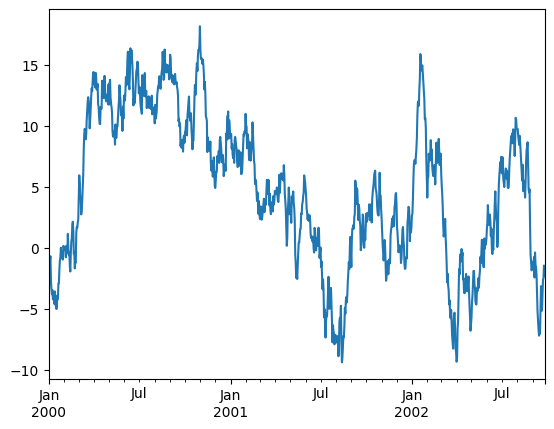

In [87]:
import matplotlib.pyplot as plt
plt.close("all")

ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2000", periods=1000))
ts = ts.cumsum()
ts.plot();

If running under Jupyter Notebook, the plot will appear on [`plot()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.plot.html#pandas.Series.plot). Otherwise use [`matplotlib.pyplot.show`](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.show.html) to show it or [`matplotlib.pyplot.savefig`](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.savefig.html) to write it to a file.

On a DataFrame, the [`plot()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot) method is a convenience to plot all of the columns with labels:

<Figure size 640x480 with 0 Axes>

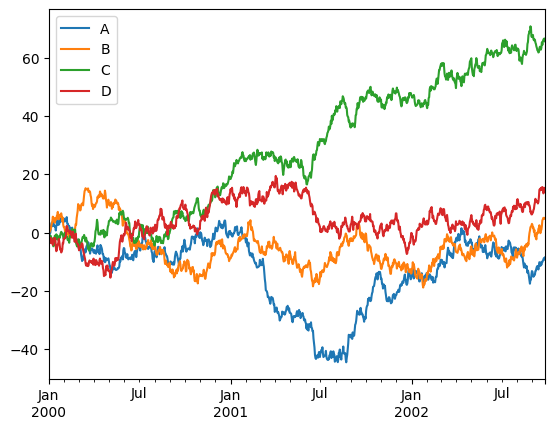

In [89]:
df = pd.DataFrame(
    np.random.randn(1000, 4), index=ts.index, columns=["A", "B", "C", "D"]
)

df = df.cumsum()
plt.figure();
df.plot();
plt.legend(loc='best');

## Importing and exporting data

### CSV

[Writing to a csv file](https://pandas.pydata.org/docs/user_guide/io.html#io-store-in-csv): using [`DataFrame.to_csv()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html#pandas.DataFrame.to_csv)

In [90]:
df.to_csv("foo.csv")

[Reading from a csv file](https://pandas.pydata.org/docs/user_guide/io.html#io-read-csv-table): using [`read_csv()`](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html#pandas.read_csv)

In [91]:
pd.read_csv("foo.csv")

,Unnamed: 0,A,B,C,D
0,2000-01-01,1.250905,-0.494166,-1.127468,-1.765694
1,2000-01-02,0.300176,0.062917,-1.589416,-2.498803
2,2000-01-03,-0.448291,0.484014,-0.902187,-3.432141
3,2000-01-04,-0.019362,0.950814,-1.285796,-3.465257
4,2000-01-05,1.648190,1.134599,-1.193860,-1.797819
...,...,...,...,...,...
995,2002-09-22,-9.625748,4.546152,65.553979,14.957524
996,2002-09-23,-9.055052,5.082550,66.072863,13.449255
997,2002-09-24,-8.772219,4.988295,66.398197,13.876091
998,2002-09-25,-9.264263,4.720767,66.516025,15.360841


### HDF5

Reading and writing to [HDFStores](https://pandas.pydata.org/docs/user_guide/io.html#io-hdf5).

Writing to a HDF5 Store using [`DataFrame.to_hdf()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_hdf.html#pandas.DataFrame.to_hdf):

In [92]:
df.to_hdf("foo.h5", "df")

Reading from a HDF5 Store using [`read_hdf()`](https://pandas.pydata.org/docs/reference/api/pandas.read_hdf.html#pandas.read_hdf):

In [93]:
pd.read_hdf("foo.h5", "df")

,A,B,C,D
2000-01-01,1.250905,-0.494166,-1.127468,-1.765694
2000-01-02,0.300176,0.062917,-1.589416,-2.498803
2000-01-03,-0.448291,0.484014,-0.902187,-3.432141
2000-01-04,-0.019362,0.950814,-1.285796,-3.465257
2000-01-05,1.648190,1.134599,-1.193860,-1.797819
...,...,...,...,...
2002-09-22,-9.625748,4.546152,65.553979,14.957524
2002-09-23,-9.055052,5.082550,66.072863,13.449255
2002-09-24,-8.772219,4.988295,66.398197,13.876091
2002-09-25,-9.264263,4.720767,66.516025,15.360841


### Excel

Reading and writing to [Excel](https://pandas.pydata.org/docs/user_guide/io.html#io-excel).

Writing to an excel file using [`DataFrame.to_excel()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_excel.html#pandas.DataFrame.to_excel):

In [94]:
df.to_excel("foo.xlsx", sheet_name="Sheet1")

Reading from an excel file using [`read_excel()`](https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html#pandas.read_excel):

In [95]:
pd.read_excel("foo.xlsx", "Sheet1", index_col=None, na_values=["NA"])

,Unnamed: 0,A,B,C,D
0,2000-01-01,1.250905,-0.494166,-1.127468,-1.765694
1,2000-01-02,0.300176,0.062917,-1.589416,-2.498803
2,2000-01-03,-0.448291,0.484014,-0.902187,-3.432141
3,2000-01-04,-0.019362,0.950814,-1.285796,-3.465257
4,2000-01-05,1.648190,1.134599,-1.193860,-1.797819
...,...,...,...,...,...
995,2002-09-22,-9.625748,4.546152,65.553979,14.957524
996,2002-09-23,-9.055052,5.082550,66.072863,13.449255
997,2002-09-24,-8.772219,4.988295,66.398197,13.876091
998,2002-09-25,-9.264263,4.720767,66.516025,15.360841


## Gotchas

If you are attempting to perform a boolean operation on a [`Series`](https://pandas.pydata.org/docs/reference/api/pandas.Series.html#pandas.Series) or [`DataFrame`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame) you might see an exception like:

To use a Series in an if statement, you need to reduce it to a single boolean value. You can use one of the following methods:

any(): Checks if any of the values in the Series are True.

all(): Checks if all of the values in the Series are True.


In [100]:
if pd.Series([False, True, False]).any():
     print("I was true")

I was true


See [Comparisons](https://pandas.pydata.org/docs/user_guide/basics.html#basics-compare) and [Gotchas](https://pandas.pydata.org/docs/user_guide/gotchas.html#gotchas) for an explanation and what to do.